In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fears24/faers_ascii_2019Q1 (1)/FAQs.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/Readme.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/OUTC19Q1.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/DEMO19Q1.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/DRUG19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/REAC19Q1.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/REAC19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/INDI19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/DEMO19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/THER19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/DRUG19Q1.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/THER19Q1.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/ASC_NTS.pdf
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/OUTC19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/RPSR19Q1.txt
/kaggle/input/fears24/faers_ascii_2019Q1 (1)/ascii/RPSR19Q1

In [ ]:
import os
import zipfile

# Paths to your ZIP files (update with your actual file names)
zip_files = [
    "faers_ascii_2019Q1.zip",
    "faers_ascii_2019Q2.zip",
    "faers_ascii_2019Q3.zip",
    "faers_ascii_2019Q4.zip"
]

# Base directory for extraction
base_extract_dir = "faers_data"

# Step 1: Extract all ZIP files into separate folders
for zip_file in zip_files:
    # Derive quarter name from file name
    quarter_name = os.path.splitext(os.path.basename(zip_file))[0]
    extract_dir = os.path.join(base_extract_dir, quarter_name)

    # Extract the ZIP file
    if not os.path.exists(extract_dir):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
            print(f"Extracted {zip_file} to {extract_dir}")
    else:
        print(f"{quarter_name} is already extracted!")

# Step 2: Explore the folder structure for all quarters
print("\nExtracted folders and files:")
for root, dirs, files in os.walk(base_extract_dir):
    print(f"Folder: {root}")
    for file in files:
        print(f"  - File: {file}")

# Step 3: Organize all 'ascii' folders for further analysis
ascii_folders = []
for quarter in os.listdir(base_extract_dir):
    quarter_path = os.path.join(base_extract_dir, quarter, "ascii")
    if os.path.exists(quarter_path):
        ascii_folders.append(quarter_path)

print("\n'Ascii' folders found:")
for folder in ascii_folders:
    print(f"  - {folder}")


In [2]:
import os
import pandas as pd

# Base directory where all the quarterly data resides
base_dir = "/kaggle/input/fears24"

# Dictionary to store DataFrames for each file type across quarters
data_files = {
    "DEMO": [],
    "DRUG": [],
    "REAC": [],
    "THER": [],
    "OUTC": [],
    "RPSR": [],
    "INDI": []
}

# Step 1: Traverse through all quarters and their ascii folders
for quarter_dir in os.listdir(base_dir):
    quarter_path = os.path.join(base_dir, quarter_dir, "ascii")
    if os.path.exists(quarter_path):
        print(f"Processing quarter: {quarter_dir}")

        # Step 2: Load each TXT file in the 'ascii' folder
        for file in os.listdir(quarter_path):
            if file.endswith(".txt"):
                file_type = file.split("19")[0].upper()  # Extract file type prefix
                file_path = os.path.join(quarter_path, file)
                
                # Step 3: Read the TXT file into a DataFrame
                try:
                    df = pd.read_csv(file_path, sep="$", engine="python", encoding="latin1", on_bad_lines="skip")
                    data_files[file_type].append(df)
                    print(f"Loaded {file} with {len(df)} rows.")
                except Exception as e:
                    print(f"Error loading {file}: {e}")

# Step 4: Merge data for each file type across all quarters
merged_data = {}
for file_type, dfs in data_files.items():
    if dfs:  # Check if any data exists for the file type
        merged_data[file_type] = pd.concat(dfs, ignore_index=True)
        print(f"Merged {file_type}: {len(merged_data[file_type])} rows.")

# Step 5: Save the merged data to CSV (if needed)
output_dir = "./output"
os.makedirs(output_dir, exist_ok=True)
for file_type, df in merged_data.items():
    output_path = os.path.join(output_dir, f"{file_type}_merged.csv")
    df.to_csv(output_path, index=False)
    print(f"Saved merged data for {file_type} to {output_path}.")


Processing quarter: faers_ascii_2019Q1 (1)
Loaded DRUG19Q1.txt with 1648987 rows.
Loaded REAC19Q1.txt with 1303532 rows.
Loaded INDI19Q1.txt with 1106754 rows.
Loaded DEMO19Q1.txt with 413734 rows.
Loaded THER19Q1.txt with 627355 rows.
Loaded OUTC19Q1.txt with 310662 rows.
Loaded RPSR19Q1.txt with 16018 rows.
Processing quarter: faers_ascii_2019Q4 (1)
Loaded INDI19Q4.txt with 1146938 rows.
Loaded DRUG19Q4.txt with 1714177 rows.
Loaded REAC19Q4.txt with 1359922 rows.
Loaded DEMO19Q4.txt with 419581 rows.
Loaded THER19Q4.txt with 643525 rows.
Loaded RPSR19Q4.txt with 23774 rows.
Loaded OUTC19Q4.txt with 321603 rows.
Processing quarter: faers_ascii_2019Q3 (1)
Loaded THER19Q3.txt with 776039 rows.
Loaded RPSR19Q3.txt with 20652 rows.
Loaded DRUG19Q3.txt with 1982442 rows.
Loaded DEMO19Q3.txt with 452873 rows.
Loaded REAC19Q3.txt with 1504790 rows.
Loaded OUTC19Q3.txt with 323787 rows.
Loaded INDI19Q3.txt with 1353011 rows.
Processing quarter: faers_ascii_2019Q2 (1)
Loaded OUTC19Q2.txt with

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load the merged "DEMO" dataset
demo_data = pd.read_csv("./output/DEMO_merged.csv")

# Preview the data
print(demo_data.head())


/tmp/ipykernel_30/513123943.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  demo_data = pd.read_csv("./output/DEMO_merged.csv")


    primaryid    caseid  caseversion i_f_code    event_dt      mfr_dt  \
0  1000661812  10006618           12        F         NaN  20190301.0   
1  1000808590  10008085           90        F  20131213.0  20190129.0   
2   100107484  10010748            4        F      2014.0  20190121.0   
3   100157133  10015713            3        F         NaN  20190206.0   
4   100171328  10017132            8        F  20140908.0  20190219.0   

   init_fda_dt    fda_dt rept_cod auth_num  ... age_grp sex e_sub     wt  \
0     20140313  20190311      PER      NaN  ...     NaN   F     Y    NaN   
1     20140313  20190212      EXP      NaN  ...     NaN   F     Y  50.34   
2     20140314  20190128      EXP      NaN  ...       A   M     Y    NaN   
3     20140317  20190215      PER      NaN  ...     NaN   F     Y  71.20   
4     20140318  20190228      EXP      NaN  ...     NaN   F     Y    NaN   

  wt_cod     rept_dt to_mfr occp_cod  reporter_country occr_country  
0    NaN  20190311.0    NaN       

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load the merged "DEMO" dataset
drug_data = pd.read_csv("./output/DRUG_merged.csv")

# Preview the data
drug_data.head()


/tmp/ipykernel_30/954324221.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_data = pd.read_csv("./output/DRUG_merged.csv")


,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,1000661812,10006618,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,20702.0,NaN,NaN,FILM-COATED TABLET,NaN
1,1000661812,10006618,2,SS,BENTYL,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000661812,10006618,3,SS,DICYCLOMINE,DICYCLOMINE HYDROCHLORIDE,1,NaN,UNK,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000808590,10008085,1,PS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"20 MG, BIW",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,20.0,MG,NaN,QOW
4,1000808590,10008085,2,SS,SANDOSTATIN LAR DEPOT,OCTREOTIDE ACETATE,1,Intramuscular,"30 MG, QMO",NaN,NaN,NaN,NaN,NaN,NaN,21008.0,30.0,MG,NaN,/month


In [20]:
print(drug_data.columns)


Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq'],
      dtype='object')


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load the merged "DEMO" dataset
reaction_data = pd.read_csv('./output/REAC_merged.csv')  # Replace with the actual path
# Preview the data
reaction_data.head()


,primaryid,caseid,pt,drug_rec_act
0,1000661812,10006618,Drug hypersensitivity,NaN
1,1000661812,10006618,Muscular weakness,NaN
2,1000661812,10006618,Rash,NaN
3,1000661812,10006618,Urticaria,NaN
4,1000808590,10008085,Abdominal adhesions,NaN


In [18]:
# Example: If you have a "DRUG" column in your data
relevant_drugs = ['Tramal', 'Gabapentin', 'Lyrica']

# Filtering the dataset for the drugs of interest
drug_dat = drug_data[drug_data['drugname'].str.contains('|'.join(relevant_drugs), case=False, na=False)]
print(drug_dat.head())


    primaryid    caseid  drug_seq role_cod drugname     prod_ai  val_vbm  \
53  100244892  10024489         1       PS   LYRICA  PREGABALIN        1   
54  100244892  10024489         2       SS   LYRICA  PREGABALIN        1   
55  100244892  10024489         3       SS   LYRICA  PREGABALIN        1   
56  100244892  10024489         4       SS   LYRICA  PREGABALIN        1   
57  100244892  10024489         5       SS   LYRICA  PREGABALIN        1   

   route                                           dose_vbm  cum_dose_chr  \
53  Oral                                                UNK           NaN   
54  Oral                                     200 MG, 3X/DAY           NaN   
55  Oral                                     150 MG, 3X/DAY           NaN   
56   NaN  300 MG, DAILY [MOST DAYS SHE TAKES TWO 150MG L...           NaN   
57   NaN  UNK [SHE MAY TAKE 2 LYRICA DURING THE DAY AND ...           NaN   

   cum_dose_unit dechal rechal lot_num exp_dt  nda_num  dose_amt dose_unit  \
53

/tmp/ipykernel_30/452252485.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_data = pd.read_csv("./output/DRUG_merged.csv")


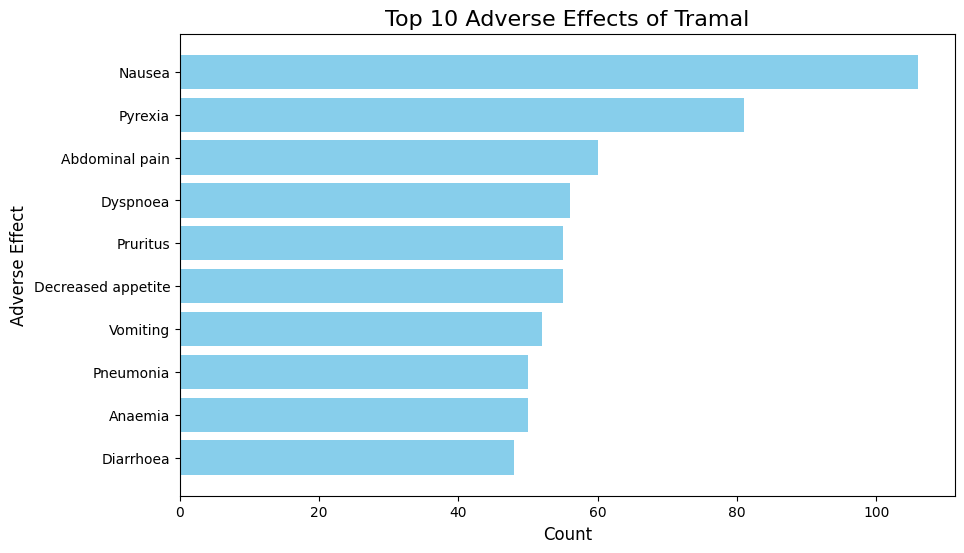

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
drug_data = pd.read_csv("./output/DRUG_merged.csv")
reaction_data = pd.read_csv('./output/REAC_merged.csv')  # Replace with the actual path

# Filter for Tramal
tramal_data = drug_data[drug_data['drugname'].str.contains('Tramal', case=False, na=False)]

# Merge with reaction data
merged_data = pd.merge(tramal_data, reaction_data, on='primaryid')

# Group and get the top 10 adverse effects
top_tramal_reactions = (
    merged_data.groupby('pt')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='count')
)

# Plot the top 10 adverse effects
plt.figure(figsize=(10, 6))
plt.barh(top_tramal_reactions['pt'], top_tramal_reactions['count'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Adverse Effects of Tramal', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Adverse Effect', fontsize=12)
plt.show()


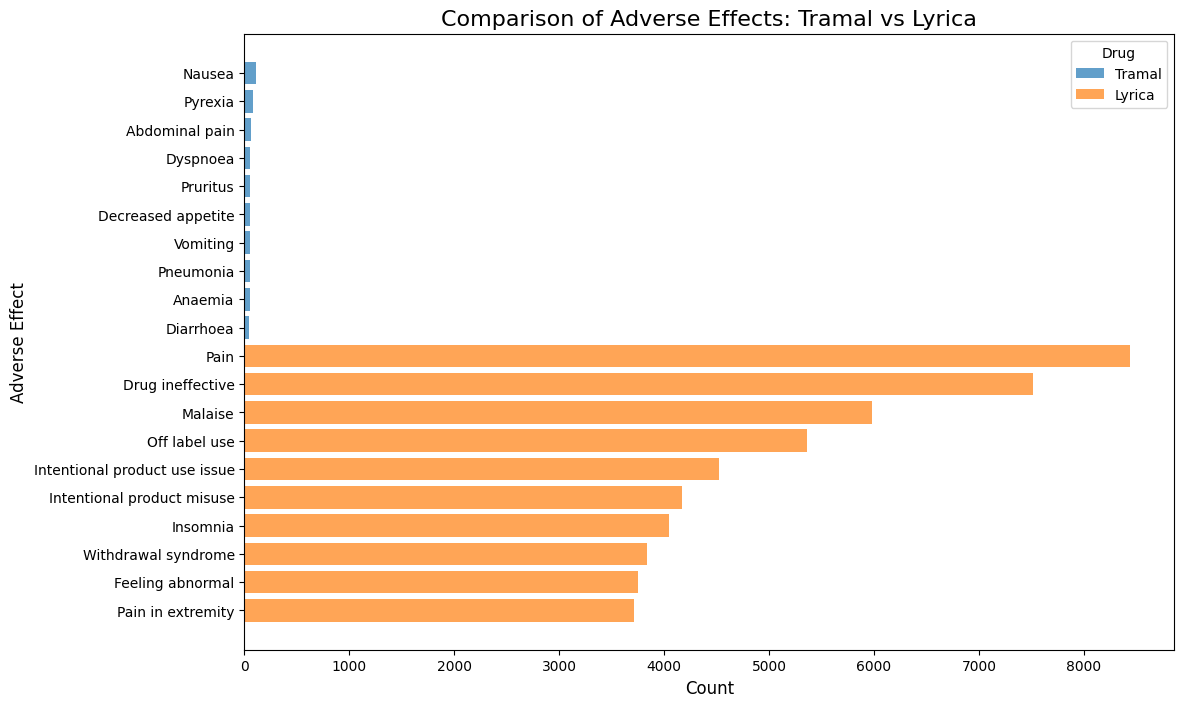

In [24]:
# Filter for Lyrica
lyrica_data = drug_data[drug_data['drugname'].str.contains('Lyrica', case=False, na=False)]

# Merge with reaction data
lyrica_merged = pd.merge(lyrica_data, reaction_data, on='primaryid')

# Group and get the top 10 adverse effects for Lyrica
top_lyrica_reactions = (
    lyrica_merged.groupby('pt')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='count')
)

# Add a column to identify the drug
top_tramal_reactions['drug'] = 'Tramal'
top_lyrica_reactions['drug'] = 'Lyrica'

# Combine Tramal and Lyrica data
comparison_data = pd.concat([top_tramal_reactions, top_lyrica_reactions])

# Plot comparison
plt.figure(figsize=(12, 8))
for drug in comparison_data['drug'].unique():
    subset = comparison_data[comparison_data['drug'] == drug]
    plt.barh(subset['pt'], subset['count'], label=drug, alpha=0.7)

plt.gca().invert_yaxis()
plt.title('Comparison of Adverse Effects: Tramal vs Lyrica', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Adverse Effect', fontsize=12)
plt.legend(title='Drug')
plt.show()


In [26]:
!pip install pptx

^C


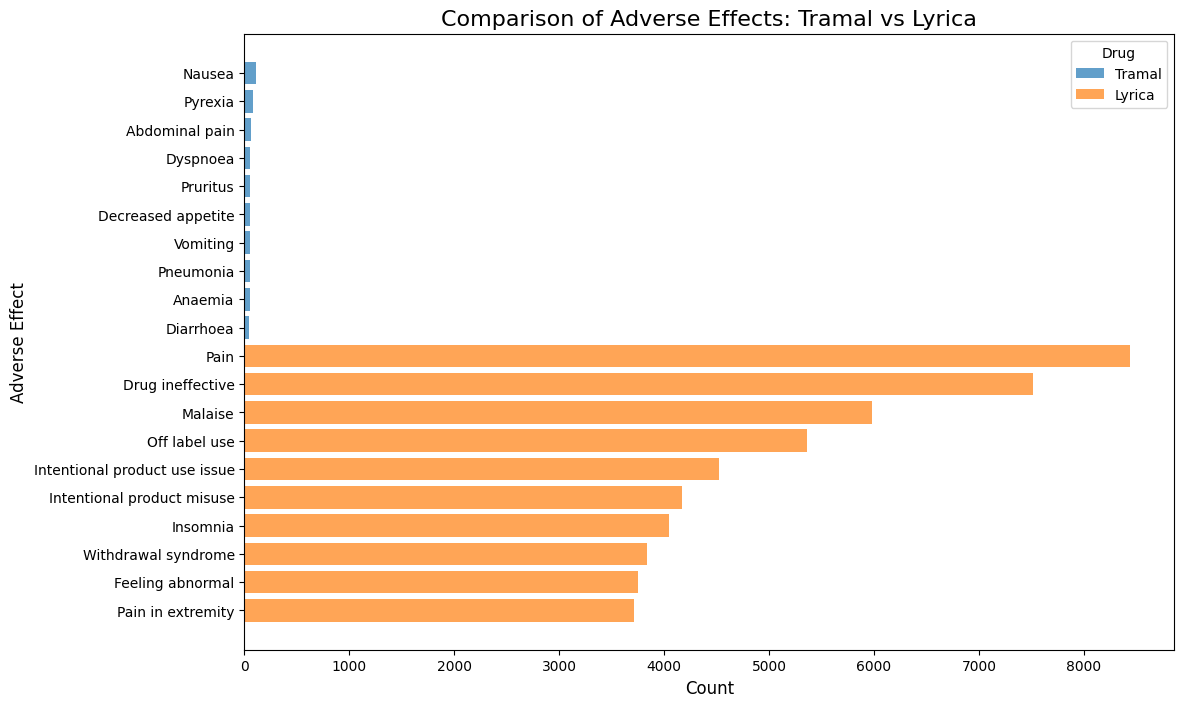

In [28]:
# Save the figure as a PNG file
plt.figure(figsize=(12, 8))
for drug in comparison_data['drug'].unique():
    subset = comparison_data[comparison_data['drug'] == drug]
    plt.barh(subset['pt'], subset['count'], label=drug, alpha=0.7)

plt.gca().invert_yaxis()
plt.title('Comparison of Adverse Effects: Tramal vs Lyrica', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Adverse Effect', fontsize=12)
plt.legend(title='Drug')
plt.savefig('comparison_adverse_effects.png', dpi=300)  # Save to PNG
plt.show()


In [30]:
# Save files to the working directory
plt.savefig('/kaggle/working/comparison_adverse_effects.png', dpi=300)
comparison_data.to_csv('/kaggle/working/comparison_data.csv', index=False)


<Figure size 640x480 with 0 Axes>